# Telco Churn Predictions

## Question: Why are customers churning? 

### Goals: Predict which customers are going to churn and what features are causing churn.

### Plan: 
1. Acquire clean and prepared data from .py files
2. Establish a baseline model from the percentage of people who have churned in the data.
3. Run a model and compare that to the baseline percentage.
4. Adjust the data and run another model compared to the first model. 
5. Perform exploratory analysis to gain a sense of feature correlations.
6. Summraize my findings.
7. Create a new model or modify an existing model based on the information found from exploratory analysis.
8. Run a few models with different inputs in order to find the best running model.
9. Once I find my model, run my test data through it to check its efficiency.
10. Create a CSV file as a deliverable for manager.

### Data Dictionary
(Alphabetical Order)

**Churn:** whether or not a customer has defected; represented as 0 == churn, 1 == not churned 

**Contract Type:** type of contract a person has, represented as month-to-month, one year, two year. I will drop this column in the prepare stage since it is a duplicate of contract type id. I brought it in originally with the data in order to explore the entire dataset. 

**Contract Type ID:** type of contract a customer has; represented as 1 == month-to-month, 2 == 1 year, 3 == 2 year

**Customer ID:** unique identifier for each customer, represented with 10 characters

**Family:** single column combined from dependents and partner columns, represented as 0 == does not have family member, 1 == has family member

**Gender:** whether a customer is male or female, represented as 0 == male, 1 == female

**Internet Service Type:** type of internet service a person has, represented as DSL, Fiber Optic, None. I will drop this column in the prepare stage since it is a duplicate of internet service type id. I brought it in originally with the data in order to explore the entire dataset.

**Internet Service Type ID:** type of internet service a customer has, represented as 1 == DSL, 2 == Fiber Optic, 3 == None

**Monthly Charges:** amount of charges per month

**Paperless Billing:** whether a customer has paperless billing or not, represented as 0 == inactive paperless billing, 1 == active paperless billing

**Payment Type:** type of payment setup for a customer represented as Electronic Check, Mail Check, Bank Transfer (auto), Credit Card (auto). I will drop this column because it is a duplicate of payment type id. I brought it in originally with the data in order to explore the entire dataset.

**Payment Type ID:** type of payment setup for a customer represented as 1 == Electronic Check, 2 == Mail Check, 3 == Bank Transfer (auto), 4 == Credit Card (auto)

**Phone Service:** whether a customer has phone service or not, represented as 0 == no phone service, 1 == has phone service 

**Senior Citizen:** whether a customer is a senior or not, represented as 0 == not a senior citizen, 1 == senior citizen

**Streaming Services:** whether a customer has a streaming service, represented as 0 == does not have a streaming service, 1 == has a streaming service.

**Tech Supoort:**  whether a customer has tech support or not, represented as 0 == not having tech support, 1 == has tech support

**Tenure:** number of months a customer was/or continues to be a customer

**Total Charges:** amount of charges over full tenure as customer


**Removed Columns:**


**Dependents:** whether a customer has any dependents or not, represented as 0 == no dependents, 1 == dependents. I dropped this column because I combined it with partner to create 'family' column. 

**Partner:** whether a customer has a partner or not, represented as 0 == no partner, 1 == has partner. I dropped this column to combine with dependents to create 'family' and condense the dataframe. 

**Streaming Movies:** whether a customer has streaming movies service or not, represented as 0 == not having movie streaming services, 1 == having movie streaming services. I dropped this column to create streaming service column from this column and streaming tv column.

**Streaming TV:** whether a customer has streaming tv service or not, represented as 0 == not having tv streaming services, 1 == has tv streaming services. I dropped this column to create streaming service column from this column and streaming movies column.

## Imports
Import the necessary libraries needed to create predictive models.

In [92]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
import graphviz

from util import get_db_url
import acquire
import prepare
import split_scale
import feature_selection

- I am bringing in the data using functions I created that bring in a clean, working dataframe.

**Task:** Look at the dataframe information, then create a baseline model.

In [2]:
df = acquire.acquire_telco()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,tenure,phone_service,multiple_lines,online_security,...,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,family,streaming_services
0,2,1,1,0003-MKNFE,Male,0,9,Yes,Yes,No,...,No,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,False,True
1,4,1,1,0013-MHZWF,Female,0,9,Yes,No,No,...,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),True,True
2,1,1,1,0015-UOCOJ,Female,1,7,Yes,No,Yes,...,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check,False,False
3,1,1,1,0023-HGHWL,Male,1,1,No,No phone service,No,...,No,Yes,25.1,25.10,Yes,Month-to-month,DSL,Electronic check,False,False
4,3,1,1,0032-PGELS,Female,0,1,No,No phone service,Yes,...,No,No,30.5,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic),True,False


In [3]:
df.shape

(7032, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
payment_type_id             7032 non-null int64
internet_service_type_id    7032 non-null int64
contract_type_id            7032 non-null int64
customer_id                 7032 non-null object
gender                      7032 non-null object
senior_citizen              7032 non-null int64
tenure                      7032 non-null int64
phone_service               7032 non-null object
multiple_lines              7032 non-null object
online_security             7032 non-null object
online_backup               7032 non-null object
device_protection           7032 non-null object
tech_support                7032 non-null object
paperless_billing           7032 non-null object
monthly_charges             7032 non-null float64
total_charges               7032 non-null float64
churn                       7032 non-null object
contract_type               7032 non-null object
internet_servi

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7032.0,2.315557,1.149523,1.00,1.0000,2.000,3.0000,4.00
internet_service_type_id,7032.0,1.872582,0.737271,1.00,1.0000,2.000,2.0000,3.00
contract_type_id,7032.0,1.688567,0.832934,1.00,1.0000,1.000,2.0000,3.00
senior_citizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


#### Rate of Churn
- Calculate the rate of churn thus far in the data for a starting point.

In [6]:
churn_rate = df.churn.value_counts()
basic_churn_df = pd.DataFrame(churn_rate) 
basic_churn_df

,churn
No,5163
Yes,1869


In [7]:
churn_rate_base = 1869/7032
print(churn_rate_base)

0.26578498293515357


**Takeaway:** If I were to guess that no customers churn, I would be right about 73% of the time.

## Baseline: 73%

**Task:** Create a model that performs better than the baseline 73%.

### Model 1: Decision Tree
- This baseline model will use three numeric features: tenure, monthy charges and total charges. I chose these features at random since they are already numeric values to get a baseline.
- In order to predict churn, I will need to first make 'churn' a numeric value as well by encoding the column.
- I will use a Decision Tree model because it is a relatively simple model to create.

In [8]:
base_encoder = LabelEncoder()
df.churn = base_encoder.fit_transform(df.churn)
df.churn.head()

0    0
1    0
2    0
3    1
4    1
Name: churn, dtype: int64

In [9]:
X = df[['tenure', 'monthly_charges', 'total_charges']]
y = df[['churn']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=123)

In [11]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [12]:
y_pred = clf.predict(X_train)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [13]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.36346516, 0.63653484],
       [0.91964286, 0.08035714],
       [0.87067395, 0.12932605],
       ...,
       [0.87067395, 0.12932605],
       [0.63268156, 0.36731844],
       [0.36346516, 0.63653484]])

#### Evaluate Model 1

In [14]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [15]:
confusion_matrix(y_train, y_pred)

array([[3298,  327],
       [ 684,  613]])

In [16]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3625
           1       0.65      0.47      0.55      1297

    accuracy                           0.79      4922
   macro avg       0.74      0.69      0.71      4922
weighted avg       0.78      0.79      0.78      4922



**Takeaways:** The accuracy score for this baseline model is at about 79%. We must also look at the precision, recall and f1-score for those who have churned when comparing models moving forward. This model 1 performs better than the 73% baseline. Focusing on the 47% Recall score for those who have churned (1), I will see if I can find an better performing model.

**Task:** Create a different model with different features.

### Model 2: Encoded Decision Tree
- In order to run another model, I am going to recall the data for a fresh start to make adjustments for another model.
- I will set the customer id as the index, since I do not want to get rid of it and the values in that column will not be encoded.
- I will perform any necessary changes needed with functions I have already created.

**Task:** Split and encode the data.

In [17]:
df = acquire.acquire_telco()
df.set_index('customer_id', inplace=True)
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,family,streaming_services
customer_id,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,2,1,1,Male,0,9,Yes,Yes,No,No,...,No,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,False,True
0013-MHZWF,4,1,1,Female,0,9,Yes,No,No,No,...,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),True,True
0015-UOCOJ,1,1,1,Female,1,7,Yes,No,Yes,No,...,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check,False,False
0023-HGHWL,1,1,1,Male,1,1,No,No phone service,No,No,...,No,Yes,25.1,25.10,Yes,Month-to-month,DSL,Electronic check,False,False
0032-PGELS,3,1,1,Female,0,1,No,No phone service,Yes,No,...,No,No,30.5,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic),True,False


In [18]:
train, test = split_scale.split_my_data(df)
train.shape
test.shape

(2110, 21)

In [19]:
train_encode, test_encode = prepare.encode(train, test)
train_encode.head()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn,family,streaming_services
customer_id,,,,,,,,,,,,,,,,,,
3866-MDTUB,1,1,1,0,0,2,1,0,2,0,0,0,1,70.75,146.90,1,0,1
5555-RNPGT,4,3,1,1,0,10,1,2,1,1,1,1,0,24.80,223.90,0,1,0
3727-OWVYD,2,1,2,1,0,35,1,0,2,2,2,0,0,61.20,2021.20,0,0,0
2270-CHBFN,4,2,1,0,0,44,1,2,2,2,2,2,1,95.10,4060.55,0,1,0
6892-XPFPU,1,2,1,1,1,24,1,2,0,2,2,0,1,104.25,2433.90,1,1,1


In [20]:
X_train = train_encode.drop(['churn'],axis=1)
y_train = train_encode[['churn']]
X_test = test_encode.drop(['churn'],axis=1)
y_test = test_encode[['churn']]

- After tidying up the data, I will not plug it into a decision tree to test if more features will get better results than just the three features previously chosen.

In [21]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [22]:
y_pred = clf.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.82075472, 0.17924528],
       [0.82075472, 0.17924528],
       [0.95263158, 0.04736842],
       ...,
       [0.95263158, 0.04736842],
       [0.82075472, 0.17924528],
       [0.51969504, 0.48030496]])

#### Evaluate Model 2

In [24]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [25]:
print(confusion_matrix(y_train, y_pred))

[[3368  257]
 [ 775  522]]


In [26]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3625
           1       0.67      0.40      0.50      1297

    accuracy                           0.79      4922
   macro avg       0.74      0.67      0.69      4922
weighted avg       0.78      0.79      0.77      4922



**Takeaways:** The accuracy of the model is the same as model 1 at 79%, though the precision, recall and f1-scores vary a little bit. What I am looking for is a higher recall score, so this model actually has a lower recall score for those who have churned. 

**Task 1:** Create another model adjusting features to get a more evenly distributed accuracy and recall score.

**Task 2:** Perform exploratory analysis to get a better idea of how features correlate to churn.

## Exploratory Analysis

- Moving forward with the encoded data, I will now look at the correlation between all features to then find the best features to use in my predictive model. I will keep the encoded data because it will give me more flexability when choosing which features to use.

- I will begin by looking at the distribution of churn.

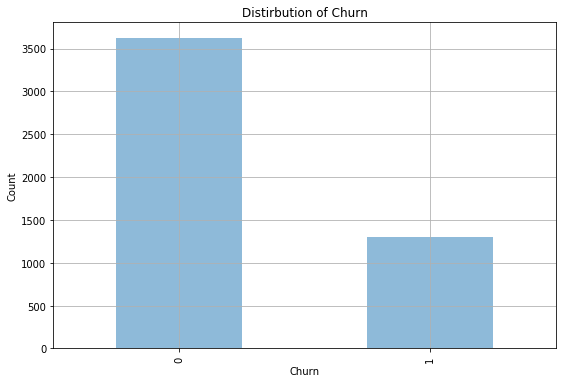

In [27]:
plt.figure(figsize=(9,6))
y_train.churn.value_counts().sort_index().plot(kind = "bar", alpha = .5)
plt.title("Distirbution of Churn")
plt.xlabel('Churn')
plt.ylabel('Count')
plt.grid(b = True , which = "major")

**Takeaway:** Significantly less people have churned (1) vs. people who have not churned (0) in our dataset.

- I will now look at the rate of churn vs tenure in months to get an idea if tenure contributes to churn.

Text(0.5, 1.0, 'Churn Rate vs. Tenure in Months')

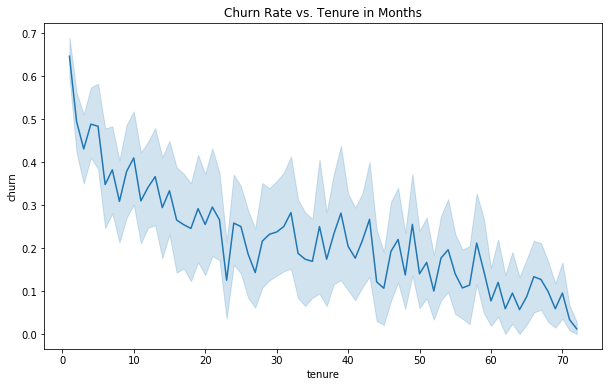

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(x='tenure', y='churn', data=train_encode)
plt.title("Churn Rate vs. Tenure in Months")

**Takeaway:** More people churned in the early months of their tenure. This could be due to different contract types, or service experiences within those first few months of tenure.

- I will now create a new column that I will not use as a feature just to look at tenure in years in relation to rate of churn.

In [29]:
train_encode["tenure_year"] = np.ceil(train_encode.tenure / 12)

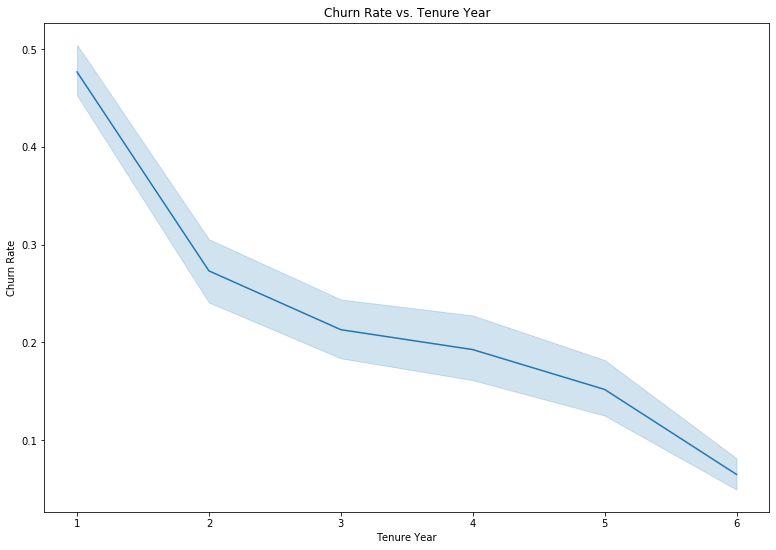

In [30]:
plt.figure(figsize=(13,9))
ax = sns.lineplot(x="tenure_year", y= "churn", data=train_encode)
plt.title("Churn Rate vs. Tenure Year")
ax.set_xlabel("Tenure Year")
ax.set_ylabel("Churn Rate")
plt.show()

**Takeaway:** It is clear from looking at tenure in year that churn decreases as tenure goes up. One might think of this as Telco is performing well, hence customers are staying longer, or they are in longer contracts with the company.

- I will now drop the newly created column 'tenure_year' because I will not include this feature in my model since it will be a duplicate of 'tenure'.

In [31]:
train_encode.drop(columns=['tenure_year'], inplace=True)

- I will further examine the churn vs tenure by looking at the count of those who churned vs did not churn each month.

In [32]:
pd.crosstab(y_train.churn, X_train.tenure, margins=True).style.background_gradient(cmap='Blues')

tenure,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,All
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,146,90,78,66,47,45,55,65,46,49,49,56,45,36,46,36,44,43,34,38,31,47,49,46,48,48,42,29,43,45,36,33,39,38,59,24,38,33,23,39,42,36,33,29,42,42,39,44,38,43,40,54,42,41,37,50,39,41,35,48,44,48,38,50,42,52,62,64,64,76,116,250,3625
1,267,88,59,63,44,24,34,29,28,34,22,29,26,15,23,13,15,14,14,13,13,17,7,16,16,11,7,8,13,14,12,13,9,8,12,8,8,10,9,10,9,10,12,4,5,10,11,7,13,7,8,6,9,10,6,6,5,11,6,4,6,3,4,3,4,8,9,7,4,8,4,3,1297
All,413,178,137,129,91,69,89,94,74,83,71,85,71,51,69,49,59,57,48,51,44,64,56,62,64,59,49,37,56,59,48,46,48,46,71,32,46,43,32,49,51,46,45,33,47,52,50,51,51,50,48,60,51,51,43,56,44,52,41,52,50,51,42,53,46,60,71,71,68,84,120,253,4922


**Takeaway:** This crosstab graph shows a count of those who have churned and those who have not churned for each month of tenure. This shows a closer look at numbers as the graph above.

- I will now look at all encoded features in relation to churn. With this, I hope to find features that I can drop in order to remove some noise when creating a model.

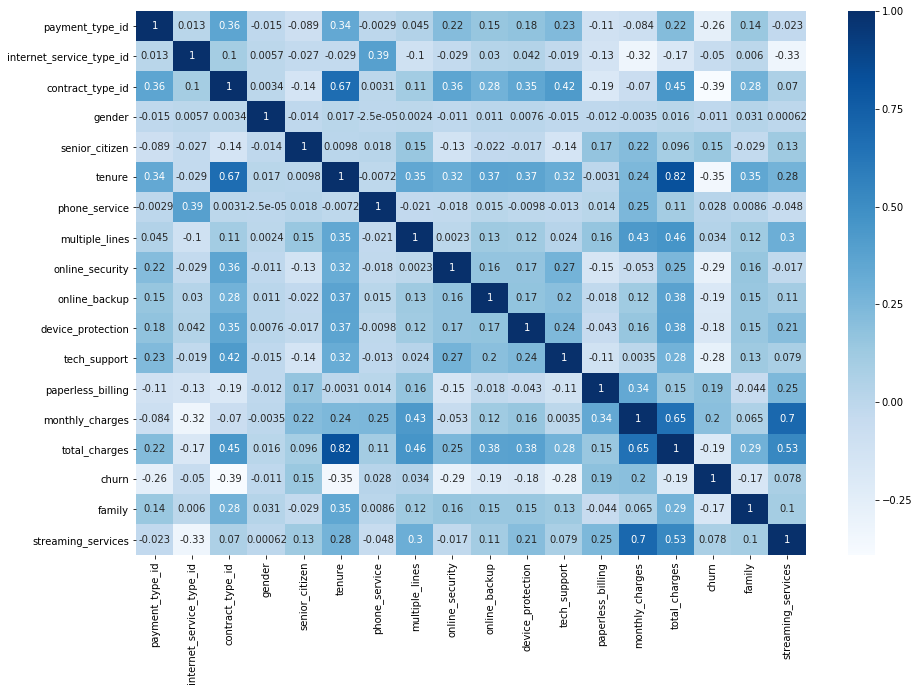

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(train_encode.corr(), cmap='Blues', annot=True)

**Takeaway:** I am able to see that some correlations are much higher than others. Some features, such as gender, have no effect on churn, and will lead me to believe that this is a column I can drop later when running a model. It also shows me that other columns, such as monthly charges, havea higher correlations to churn.

**Task:** Either use Select K Best or manually drop columns to then run selected features in a model to find the best scores.

### Question: Are there features that indicate a higher propensity to churn? Type of internet service?

Text(0, 0.5, 'Churn Rate')

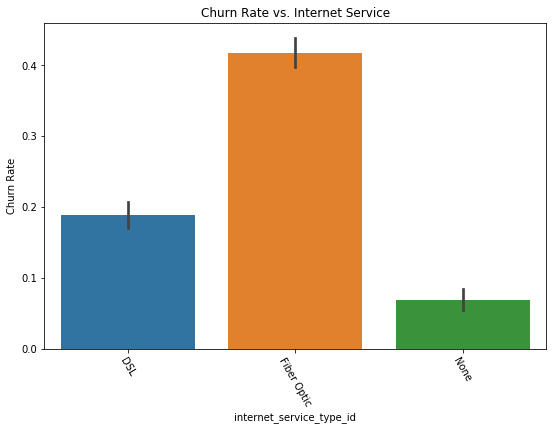

In [34]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x = "internet_service_type_id", y = "churn", data = train_encode)
ax.set_xticklabels(["DSL", "Fiber Optic", "None"])
plt.title("Churn Rate vs. Internet Service")
plt.xticks(rotation = -60)
ax.set_ylabel("Churn Rate")
# clean up x_axis label

**Takeaway:** Customers with Fiber Optic internet have a higher rate of churn compared to DSL internet and no internet by almost double.

**Task:** Further dive into internet service in relation to churn.

### Number of phone lines?

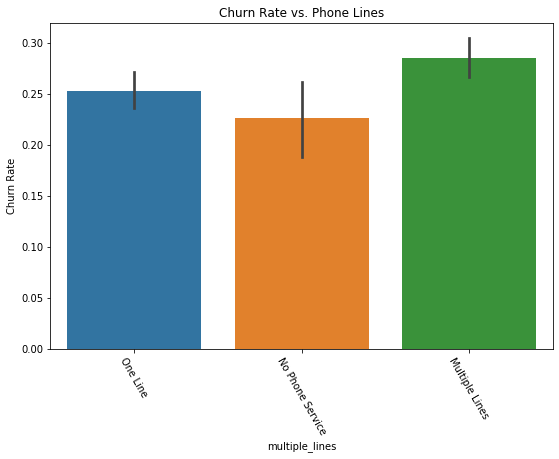

In [35]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x= "multiple_lines", y = "churn", data = train_encode)
plt.xticks(rotation = -60)
plt.title("Churn Rate vs. Phone Lines")
ax.set_xticklabels(["One Line", "No Phone Service", "Multiple Lines"])
plt.xticks(rotation = -60)
ax.set_ylabel("Churn Rate")
plt.show()

**Takeaway:** All types of phone line amounts are relatively equal when it come to rate of churn. 

### Type of phone service?

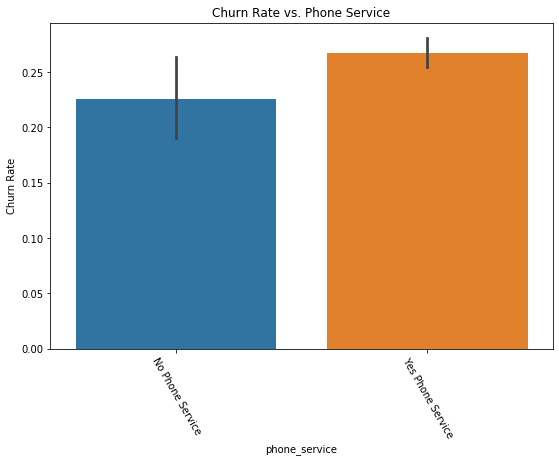

In [36]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x= "phone_service", y = "churn", data = train_encode)
plt.title("Churn Rate vs. Phone Service")
plt.xticks(rotation = -60)
ax.set_xticklabels(["No Phone Service", "Yes Phone Service"])
ax.set_ylabel("Churn Rate")
plt.show()

**Takeaway:** Whether or no a customer has phone service does not greatly vary when looking at the rate of churn.

### Online security? 

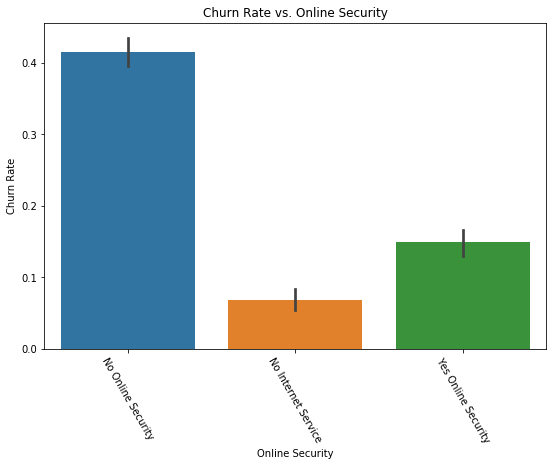

In [37]:
plt.figure(figsize=(9,6))
plt.title("Churn Rate vs. Online Security")
ax = sns.barplot(x = "online_security", y = "churn", data = train_encode)
ax.set_xticklabels(["No Online Security","No Internet Service","Yes Online Security"])
ax.set_xlabel("Online Security")
ax.set_ylabel("Churn Rate")
plt.xticks(rotation = -60)
plt.show()

**Takeaway:** Customers with no online security have a higher ratue of churn compared to those with with online security by a large amount.

**Task:** Look into and further analyze customers with no online security.

### Online backup?

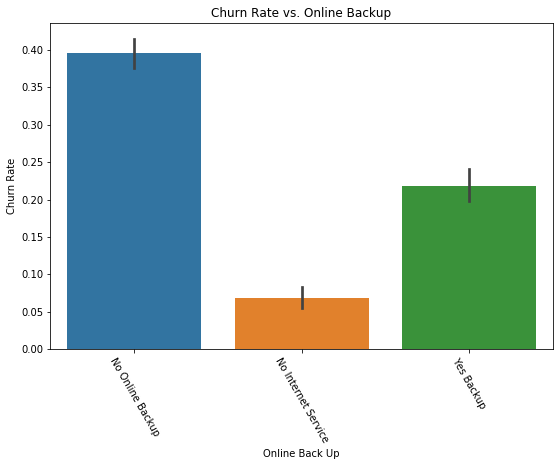

In [38]:
plt.figure(figsize=(9,6))
plt.title("Churn Rate vs. Online Backup")
ax = sns.barplot(x = 'online_backup', y = 'churn', data=train_encode)
ax.set_xticklabels(["No Online Backup","No Internet Service","Yes Backup"])
ax.set_xlabel("Online Back Up")
ax.set_ylabel("Churn Rate")
plt.xticks(rotation = -60)
plt.show()

**Takeaway:** Customers with no online backup have a higher rate of churn compared to those with backup security. 

**Task:** Since both online security and online backup are very similar, combine the two and then further analyze the newly combined column.

### Is a senior citizen?

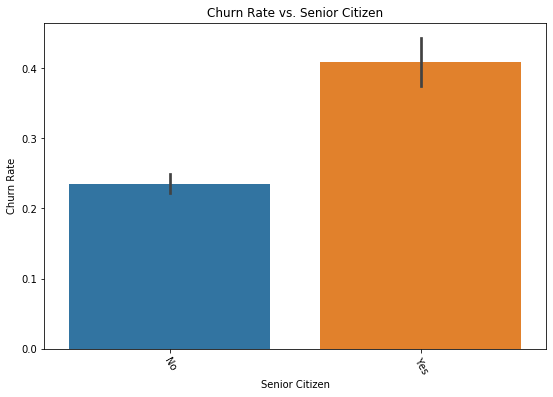

In [39]:
plt.figure(figsize=(9,6))
plt.title("Churn Rate vs. Senior Citizen")
ax = sns.barplot(x = 'senior_citizen', y ='churn', data = train_encode)
ax.set_xticklabels(["No","Yes"])
ax.set_xlabel("Senior Citizen")
ax.set_ylabel("Churn Rate")
plt.xticks(rotation = -60)
plt.show()

**Takeaway:** A senior citizen is more likey to churn versus a non-senior citizen.

**Task:** Look into percentage of senior citizen in all of those who have churned to get a better idea of make-up of those churning. This could lead to some conclusions involving senior citizens.

### Question: Is total charges driving churn?

<Figure size 864x576 with 0 Axes>

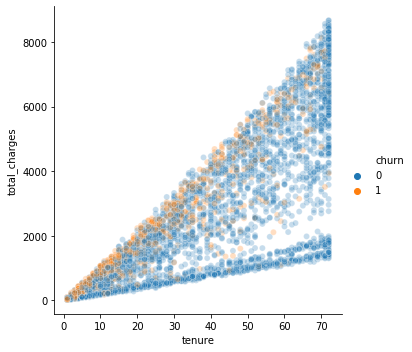

In [40]:
plt.figure(figsize=(12,8))
sns.relplot(x='tenure', y='total_charges', hue='churn', data=train_encode, alpha=.25)

**Takeaway:** You can see from this graph that the customers who churned mostly cluster around the same area, in the earlier months of tenure, but they are scattered throughout all of the tenure months. This leads me to believe that it is not the total charges that is driving churn, there must be other features that are more of a factor.

### Question: Is monthly charges driving churn?

- Just to get a better sense of monthly charges, I wanted to see what the average monthly charge is: $64.80
- I will then create a plot to get a better see if churn is happening at a certain price point for monthly charges and in a specific month if any.

In [41]:
df.monthly_charges.mean()

64.79820819112642

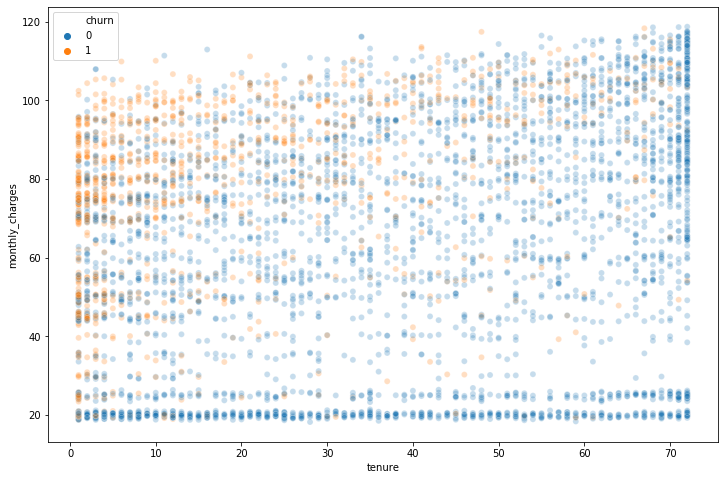

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='tenure', y='monthly_charges', hue='churn', data=train_encode, alpha=.25)

**Takeaway:** Though churn seens to congregate closer to the first 10 months around the $80 mark, I see that there is churn sprinkled throughout tenure and at different price points. Since churn is focused more towards a specific area, I will keep monthly charges in mind when selecting features to include in my model.

## Summary of my conclusions:

When further evaluating the features in relation to churn with the help of graphs, I found that some features, such as internet type (fiber optics in particular) and if a customer is a senior citizen or not have a higher rate of churn. Other features, such as contract type, tech support and payment type also have a higher correlation with churn. Columns such as gender have very little relation to why customers are churning.

**- I believe that there are multiple reasons in the data to answer why customers are churning, but I think the best way to find out is to go to the source and ask why a customer decided to leave with some sort of exit survey. There are ways to further research each area in regards to each individual feature when predicting why a customer is churning, and I would recommend that further looking into each individual area to get a bigger picture of the causes of churn in Telco customers.**

### Model 3: Random Forest
- I will now create another model using Random Forest and perform feature engineering, Select K Best, to pick the top ten features to predict churn using the encoded data.

In [89]:
feature_selection.select_kbest_fregression(X_train, y_train, k=10)

['payment_type_id',
 'contract_type_id',
 'tenure',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'paperless_billing',
 'monthly_charges',
 'total_charges']

In [44]:
X_kb_train = train_encode[['payment_type_id', 'contract_type_id', 'tenure', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'paperless_billing', 'monthly_charges', 'total_charges']]
y_kb_train = train_encode[['churn']]
X_kb_test = test_encode[['payment_type_id', 'contract_type_id', 'tenure', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'paperless_billing', 'monthly_charges', 'total_charges']]
y_kb_test = test_encode[['churn']]

In [45]:
rf_kbest_og = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='entropy',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=123)

In [46]:
rf_kbest_og.fit(X_kb_train, y_kb_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [47]:
print(rf_kbest_og.feature_importances_)

[0.05323837 0.2415763  0.17620727 0.12981053 0.02623395 0.01417683
 0.12005468 0.01439243 0.12635435 0.09795529]


In [48]:
y_pred = rf_kbest_og.predict(X_kb_train)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [49]:
y_pred_proba = rf_kbest_og.predict_proba(X_kb_train)
y_pred_proba

array([[0.49138058, 0.50861942],
       [0.8962315 , 0.1037685 ],
       [0.92191646, 0.07808354],
       ...,
       [0.93798472, 0.06201528],
       [0.64103153, 0.35896847],
       [0.40379892, 0.59620108]])

#### Evaluate Model 3

In [50]:
format(rf_kbest_og.score(X_kb_train, y_kb_train))

'0.8201950426655831'

In [51]:
print(confusion_matrix(y_train, y_pred))

[[3350  275]
 [ 610  687]]


In [52]:
print(classification_report(y_kb_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3625
           1       0.71      0.53      0.61      1297

    accuracy                           0.82      4922
   macro avg       0.78      0.73      0.75      4922
weighted avg       0.81      0.82      0.81      4922



### Model 3 Edit: 
 I will make a few adjustments to see if the model will perform better or worse with different settings.
- Select K Best K = 4
- min_sample_leaf = 3
- n_estimators = 10
- max_depth = 3

In [53]:
feature_selection.select_kbest_fregression(X_train, y_train, k=4)

['contract_type_id', 'tenure', 'online_security', 'tech_support']

In [54]:
X_kb_train = train_encode[['contract_type_id', 'tenure', 'online_security', 'tech_support']]
y_kb_train = train_encode[['churn']]
X_kb_test = test_encode[['contract_type_id', 'tenure', 'online_security', 'tech_support']]
y_kb_test = test_encode[['churn']]

In [55]:
rf_kbest = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='entropy',
                            min_samples_leaf=3,
                            n_estimators=10,
                            max_depth=3, 
                            random_state=123)

In [56]:
rf_kbest.fit(X_kb_train, y_kb_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [57]:
print(rf_kbest.feature_importances_)

[0.52311562 0.10457776 0.17887859 0.19342804]


In [58]:
y_pred = rf_kbest.predict(X_kb_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
y_pred_proba = rf_kbest.predict_proba(X_kb_train)
y_pred_proba

array([[0.63023266, 0.36976734],
       [0.77793879, 0.22206121],
       [0.89945484, 0.10054516],
       ...,
       [0.91651023, 0.08348977],
       [0.7129947 , 0.2870053 ],
       [0.53822026, 0.46177974]])

#### Evaluate Model 3 Edit

In [60]:
format(rf_kbest.score(X_kb_train, y_kb_train))

'0.7838277123120683'

In [61]:
print(confusion_matrix(y_train, y_pred))

[[3444  181]
 [ 883  414]]


In [62]:
print(classification_report(y_kb_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      3625
           1       0.70      0.32      0.44      1297

    accuracy                           0.78      4922
   macro avg       0.75      0.63      0.65      4922
weighted avg       0.77      0.78      0.75      4922



**Takeaway:** This model performed worse that the original model 3 when I changed the hyperparameters and other details in the model. Not only did the accuracy go down, so did the Churn Recall number. 
- I will keep the original model 3 with more features moving forward to use as an MVP. 

**Task:** Create one more model using all of the features instead of Select K Best to eliminate features.

### Model 3 Edit 2: Random Forest with ALL encoded features
- I am going to add back in all of the 17 features to get a sense if using all features in Random Forest will give us better results than the Select K Best features.


In [63]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='entropy',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=123)

In [64]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [65]:
print(rf.feature_importances_)

[0.04284462 0.0616554  0.2385137  0.00449974 0.0069383  0.15298906
 0.00325432 0.01027548 0.101407   0.0273086  0.01667042 0.10302621
 0.01324562 0.09449315 0.10680222 0.00651767 0.00955849]


In [66]:
y_pred = rf.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [67]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.5508176 , 0.4491824 ],
       [0.89969311, 0.10030689],
       [0.91731138, 0.08268862],
       ...,
       [0.92647337, 0.07352663],
       [0.62603634, 0.37396366],
       [0.39549317, 0.60450683]])

#### Evaluate Model 3 Edit 2

In [68]:
format(rf.score(X_train, y_train))

'0.8189760260056888'

In [69]:
print(confusion_matrix(y_train, y_pred))

[[3358  267]
 [ 624  673]]


In [70]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3625
           1       0.72      0.52      0.60      1297

    accuracy                           0.82      4922
   macro avg       0.78      0.72      0.74      4922
weighted avg       0.81      0.82      0.81      4922



**Takeaway:** This model edit performed about the same as the model with the Select K Best features, with only a percentage point less in churned Recall score. I will stay with my original model 3 since that has the best overall score of all of the models I have created.

## Final MVP Model: Model 3 Random Forest

**Task:** Run test data through chosen model without fitting it.

- Using the Select K Best features designated in my model 3, I will now test my model to evaluate how the model runs.

In [71]:
X_kb_train = train_encode[['payment_type_id', 'contract_type_id', 'tenure', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'paperless_billing', 'monthly_charges', 'total_charges']]
y_kb_train = train_encode[['churn']]
X_kb_test = test_encode[['payment_type_id', 'contract_type_id', 'tenure', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'paperless_billing', 'monthly_charges', 'total_charges']]
y_kb_test = test_encode[['churn']]

In [73]:
y_pred_test = rf_kbest_og.predict(X_kb_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 1])

In [74]:
y_pred_proba_test = rf_kbest_og.predict_proba(X_kb_test)
y_pred_proba_test

array([[0.99310093, 0.00689907],
       [0.54789   , 0.45211   ],
       [0.98124935, 0.01875065],
       ...,
       [0.99278372, 0.00721628],
       [0.84719547, 0.15280453],
       [0.15361345, 0.84638655]])

In [75]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf_kbest_og.score(X_kb_test, y_kb_test)))

Accuracy of random forest classifier on training set: 0.80


In [76]:
print(confusion_matrix(y_kb_test, y_pred_test))

[[1405  133]
 [ 285  287]]


In [77]:
print(classification_report(y_kb_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1538
           1       0.68      0.50      0.58       572

    accuracy                           0.80      2110
   macro avg       0.76      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



**Takeaway:** My model performed well when i introduced the test data. It was not overfitted, and the scores only went down by a point or two. This model will be relatively decent at predicting churn in Telco customers.

## Creating a CSV File from Final Model
#### Include Customer ID, probability of churn, prediction of churn

- Concat the train and test data I used in my final model to create a dataframe for my csv.

In [ ]:
df_final_csv = pd.concat([X_kb_train, X_kb_test])

In [ ]:
df_final_csv.shape

- Fit my dataframe with the chosen edits that I used for the final model to the predictive model. 

In [ ]:
y_pred = rf_kbest.predict(df_final_csv)
y_pred

In [ ]:
y_pred_proba = rf_kbest.predict_proba(df_final_csv)
y_pred_proba

- Create a new dataframe containing just the probabilities and predictions of churn.

In [ ]:
y_predictions = pd.DataFrame({'Probability': y_pred_proba[:,1], 'Predictions': (y_pred_proba[:,1] >= .5) == 1})
y_predictions.head()

- Set my index for this new dataframe as customer id to better see who is churning vs not churning.

In [ ]:
y_predictions = y_predictions.set_index(df.index)
y_predictions.head()

- Convert new dataframe into a csv file as a deliverable.

In [ ]:
y_predictions.to_csv(r'probability_and_predictions.csv')